In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('wx_user.csv')

In [3]:
df.drop_duplicates(subset='order_no', inplace=True)
df.head()

,user_id,follow_time,auth_time,createtime,order_no,paid_cash,create_date
0,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018/12/29
1,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.021012e+14,50.0,2021/1/15
2,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018110e+14,1.0,2018/11/2
3,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018122e+14,1.0,2018/12/23
4,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018121e+14,1.0,2018/12/7


In [4]:
#时间格式处理
df['follow_time'] = pd.to_datetime(df['follow_time'], format='%Y/%m/%d')
df['auth_time'] = pd.to_datetime(df['auth_time'], format='%Y/%m/%d')
df['create_date'] = pd.to_datetime(df['create_date'], format='%Y/%m/%d')

#提取年
df['follow_year'] = df['follow_time'].dt.year
df['auth_year'] = df['auth_time'].dt.year
df['create_year'] = df['create_date'].dt.year
df.head()

,user_id,follow_time,auth_time,createtime,order_no,paid_cash,create_date,follow_year,auth_year,create_year
0,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018-12-29,2023,2014.0,2018.0
1,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.021012e+14,50.0,2021-01-15,2023,2014.0,2021.0
2,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018110e+14,1.0,2018-11-02,2023,2014.0,2018.0
3,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018122e+14,1.0,2018-12-23,2023,2014.0,2018.0
4,2,2023-03-09 14:36:14,2014-08-03 22:39:25,2014/4/30 09:30:23,2.018121e+14,1.0,2018-12-07,2023,2014.0,2018.0


In [5]:
# 删除之前的 时间列 'follow_time','auth_time'，'createtime'和'create_date'
colums_to_drop = ['follow_time', 'auth_time', 'createtime', 'create_date']
df = df.drop(columns=colums_to_drop)
df

,user_id,order_no,paid_cash,follow_year,auth_year,create_year
0,2,2.018123e+14,1.0,2023,2014.0,2018.0
1,2,2.021012e+14,50.0,2023,2014.0,2021.0
2,2,2.018110e+14,1.0,2023,2014.0,2018.0
3,2,2.018122e+14,1.0,2023,2014.0,2018.0
4,2,2.018121e+14,1.0,2023,2014.0,2018.0
...,...,...,...,...,...,...
737997,761593,2.023091e+14,14980.0,2023,2023.0,2023.0
737999,761638,2.023091e+14,16980.0,2023,2023.0,2023.0
738014,761907,2.023091e+14,12980.0,2023,2023.0,2023.0
738015,761907,2.023091e+14,12980.0,2023,2023.0,2023.0


In [6]:
df_fil = df.groupby('user_id').agg({
    'paid_cash': 'sum',
    'auth_year':'first',
    'follow_year': 'first',
    'create_year': 'first'
})

df_fil

,paid_cash,auth_year,follow_year,create_year
user_id,,,,
2,21481.93,2014.0,2023,2018.0
6,1118.01,2014.0,2021,2023.0
7,601.00,2014.0,2022,2018.0
11,7225.36,2014.0,2022,2018.0
13,2421.00,2014.0,2022,2016.0
...,...,...,...,...
760849,27969.00,2023.0,2023,2023.0
761593,14980.00,2023.0,2023,2023.0
761638,16980.00,2023.0,2023,2023.0


In [7]:
#读取会员数据
df_huiyuan = pd.read_csv('huiyuan_rfm.csv')
df_huiyuan

,user_id,Recency,Frequency,Monetary,F_Quartile
0,1,25,1,301.0,NaN
1,3,36,2,600.0,1.0
2,5,80,1,300.0,NaN
3,6,5,4,597.0,3.0
4,7,53,1,300.0,NaN
...,...,...,...,...,...
73194,763289,1,1,300.0,NaN
73195,763589,0,1,300.0,NaN
73196,763671,1,1,300.0,NaN
73197,764210,0,1,300.0,NaN


In [8]:
# 合并两个数据取交集
df_merged = pd.merge(df_fil, df_huiyuan, on='user_id', how='inner')
df_merged

,user_id,paid_cash,auth_year,follow_year,create_year,Recency,Frequency,Monetary,F_Quartile
0,6,1118.01,2014.0,2021,2023.0,5,4,597.00,3.0
1,7,601.00,2014.0,2022,2018.0,53,1,300.00,NaN
2,11,7225.36,2014.0,2022,2018.0,24,4,1251.36,3.0
3,13,2421.00,2014.0,2022,2016.0,7,7,1899.00,6.0
4,15,2316.51,2017.0,2020,2018.0,11,7,1677.50,6.0
...,...,...,...,...,...,...,...,...,...
51192,760324,351.00,2023.0,2023,2023.0,2,1,300.00,NaN
51193,760404,25900.00,2023.0,2023,2023.0,1,1,300.00,NaN
51194,760815,27276.02,2023.0,2023,2023.0,1,2,600.00,1.0
51195,760849,27969.00,2023.0,2023,2023.0,1,1,300.00,NaN


In [9]:
# 定义一个函数来计算符合条件的用户数
def calculate_users(year, freq):
    mask = (df_merged['auth_year'] == year) & (df_merged['Frequency'] >= freq)
    return df_merged[mask]['paid_cash'].sum()

# 创建一个空的透视表架构
auth_years_bins = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
frequency_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]

pivot_table = pd.DataFrame(index=auth_years_bins, columns=frequency_bins)

# 使用 calculate_users 函数填充透视表
for year in auth_years_bins:
    for freq in frequency_bins:
        pivot_table.at[year, freq] = calculate_users(year, freq)

# 将结果转换为整数类型并填充缺失值
pivot_table = pivot_table.astype(int).fillna(0)

# 查看结果
print(pivot_table)

             1         2         3         4         5         6        7   \
2014    9035644   8596272   8304389   7419407   5893825   3462152  1615855   
2015   49022450  45398805  40602624  34451466  24224626  15180571  6710877   
2016   61877897  55781143  46987572  37825132  26900515  16769918  6965392   
2017   85621154  73373972  58153735  41760175  25453470  12777287  4492044   
2018   89887696  65900866  38933168  19976764   7344816   2257979   791631   
2019  119050585  73624712  32152527  10847051   3118952    878813   326771   
2020   68318758  39227128  16358215   3086485   1027467    438372   209464   
2021   32764560  14373261   3911943   1438145    630587     79220    63099   
2022    6245469   2369585    703253    316784     96556     58598        0   
2023    1233895    342210    182197     68908         0         0        0   

           8       9       10  15  
2014   459412   61932       0   0  
2015  1809547  428695   69316   0  
2016  2097625  651857   83715   0

In [10]:
pivot_table.to_csv('pivot_table_cash_frequency.csv')

In [11]:
# 定义一个函数来计算符合条件的用户数
def calculate_users(year, freq):
    mask = (df_merged['auth_year'] == year) & (df_merged['Frequency'] >= freq) & (df_merged['paid_cash'] > 80000)
    return df_merged[mask]['user_id'].nunique()

# 创建一个空的透视表架构
auth_years_bins = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
frequency_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]

pivot_table = pd.DataFrame(index=auth_years_bins, columns=frequency_bins)

# 使用 calculate_users 函数填充透视表
for year in auth_years_bins:
    for freq in frequency_bins:
        pivot_table.at[year, freq] = calculate_users(year, freq)

# 将结果转换为整数类型并填充缺失值
pivot_table = pivot_table.astype(int).fillna(0)

# 查看结果
print(pivot_table)

      1   2   3   4   5   6   7   8   9   10  15
2014   8   8   8   8   5   4   2   1   0   0   0
2015  39  38  34  29  21  15   7   2   1   0   0
2016  37  35  32  21  14   9   5   4   2   0   0
2017  36  31  25  17  11   6   2   2   2   2   0
2018  31  19  11   7   2   1   1   0   0   0   0
2019  42  27  17   7   4   1   0   0   0   0   0
2020  17   9   5   2   2   1   0   0   0   0   0
2021   2   2   2   2   2   0   0   0   0   0   0
2022   0   0   0   0   0   0   0   0   0   0   0
2023   0   0   0   0   0   0   0   0   0   0   0


In [12]:
pivot_table.to_csv('pivot_table_wx_f_cash_80000.csv')

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import hdbscan
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors


In [14]:
# 使用hdbscan进行聚类
df_fil = df_merged[df_merged['paid_cash'] <= 80000].copy()
# 数据预处理
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_fil[['auth_year', 'Frequency', 'paid_cash']])

# 使用优化的参数进行聚类
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=1800,
    min_samples=15, 
    metric='euclidean', 
    cluster_selection_epsilon=0.07, 
    alpha=3.5, 
    cluster_selection_method='eom', 
    algorithm='best')
clusterer.fit(rfm_scaled)
df_fil['Cluster'] = pd.Series(clusterer.labels_, index=df_fil.index)

# 查看结果
print(df_fil['Cluster'].value_counts())

 2     7234
 6     4589
 3     4521
 7     4348
 12    3896
 1     3415
 8     3387
 11    3319
 9     3233
 0     3022
 4     2951
 5     2888
 10    2589
-1     1593
Name: Cluster, dtype: int64


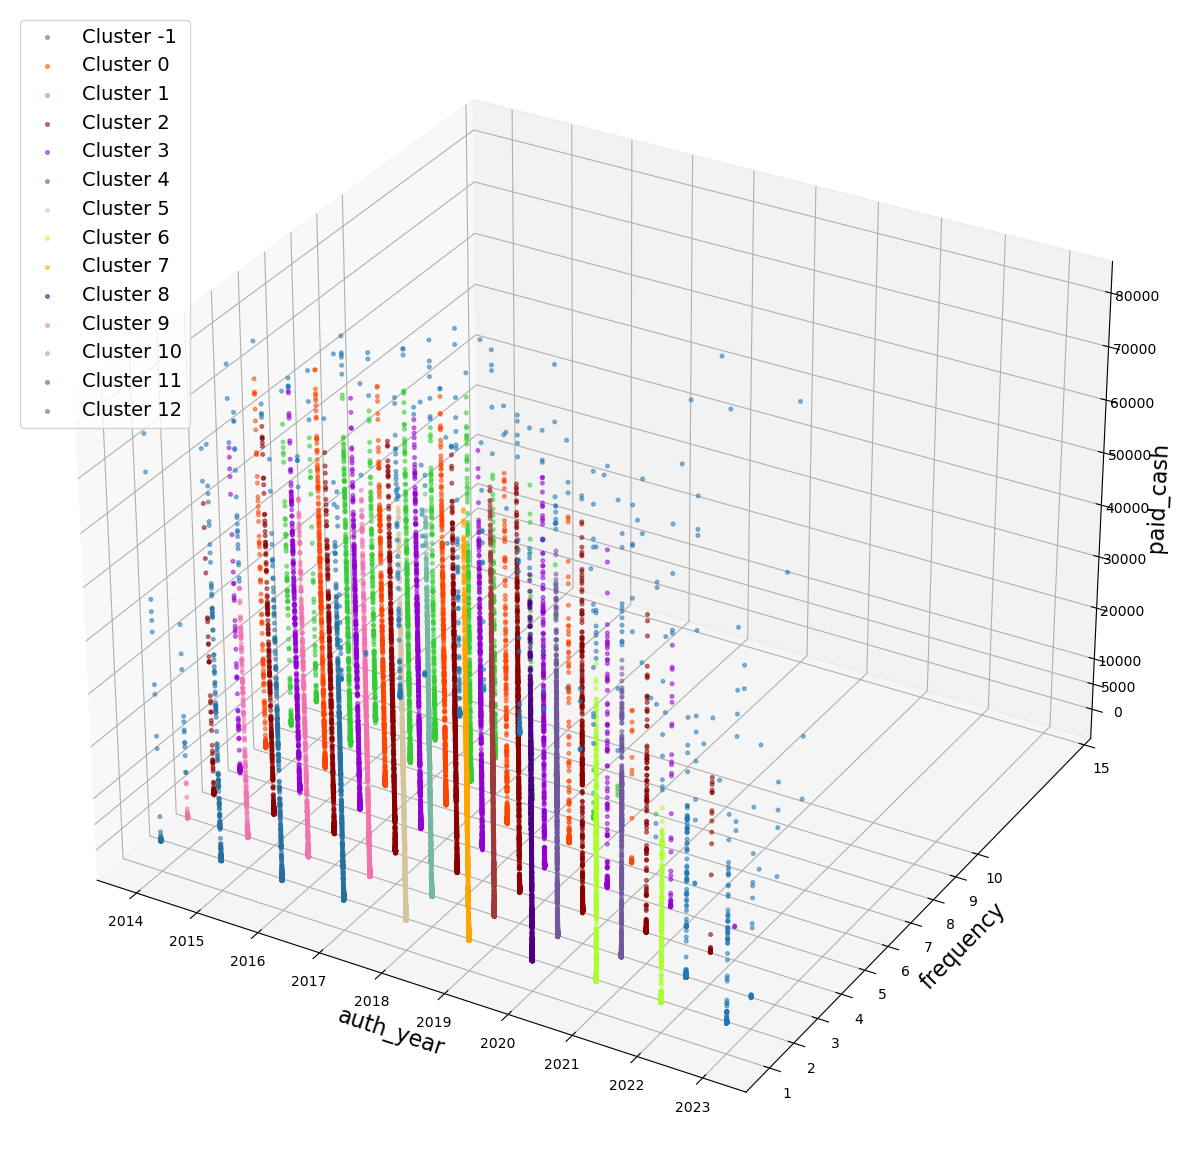

In [15]:
# 使用更为鲜明的颜色组合
colors = [
    "#1f77b4", "#ff4500", "#32cd32", "#8b0000", "#9400d3", "#2570a1", "#d5c59f",
    "#adff2f", "#ffa500", "#4b0082", "#f173ac", "#73b9a2", "#a03939", "#6f599c",
    "#ff1493", "#d2691e", "#00ced1", "#ff69b4", "#ffd700", "#f0dc70", "#007947"
]

# 进一步增加透明度
alpha_value = 0.5

# 保持点的大小
sizes = {cluster: 7 for cluster in df_fil['Cluster'].unique()}

fig = plt.figure(figsize=(20, 15))
dx = fig.add_subplot(111, projection='3d')

for i, label in enumerate(sorted(df_fil['Cluster'].unique())):
    dx.scatter(df_fil[df_fil.Cluster == label].auth_year,
               df_fil[df_fil.Cluster == label].Frequency,
               df_fil[df_fil.Cluster == label].paid_cash,
               c=[colors[i]],
               label='Cluster ' + str(label),
               s=sizes[label], alpha=alpha_value)

dx.set_xlabel('auth_year', fontsize=16)
dx.set_ylabel('frequency', fontsize=16)
dx.set_zlabel('paid_cash', fontsize=16)
dx.legend(fontsize=14, loc='upper left')
dx.grid(True)  # 保持网格

#自定义刻度
xticks = [2014, 2015, 2016, 2017, 2018, 2019, 2020,  2021, 2022, 2023]
yticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
zticks = [0, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]

dx.set_xticks(xticks)
dx.set_yticks(yticks)
dx.set_zticks(zticks)

plt.show()

In [16]:
df_merged.to_csv('wx_membership_data.csv')